In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
from fastseq.all import *
from fastai.basics import *
from fastseq.models.nbeats import *
from fastseq.data.external import *

In [ ]:
# hide
import wandb
wandb.init(project='FastSeq',entity='TakoTabak',name='index_page')
from fastai.callback.wandb import *

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path,lookback=28, horizon = 14, step=3)

Train:3245490; Valid: 4227; Test 4227


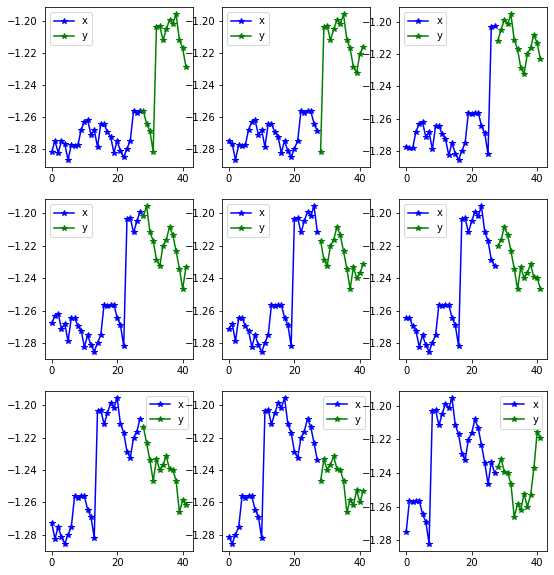

In [ ]:
# items = dummy_data_generator(50, 10, nrows=1000)
# data = TSDataLoaders.from_items(items, horizon = 7)
data.show_batch()

In [ ]:
# TODO make custom learner with custom model
learn = nbeats_learner(data,layers=[512, 512], stack_types=("trend","seasonality"), b_loss=.4, nb_blocks_per_stack=3,
                       loss_func=CombinedLoss(F.mse_loss, smape, ratio = {'smape':.05})
                      )

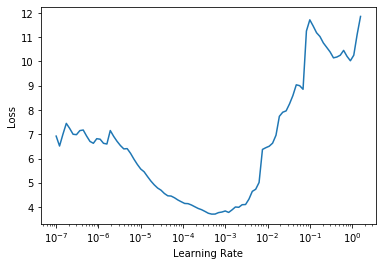

In [ ]:
from fastai.callback.all import *
learn.lr_find()

In [ ]:
# mname = 'M4-600rows-512*2-5blocksperstack'
# learn.add_cbs([WandbCallback(),SaveModelCallback(fname=mname)])

In [ ]:
learn.fit_one_cycle(3, 1e-4)
learn.recorder.plot_loss()

RuntimeError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 7.93 GiB total capacity; 5.98 GiB already allocated; 33.56 MiB free; 498.41 MiB cached)

In [ ]:
learn.show_results(2,max_n=9)

## Interperation

In [ ]:
from fastai.interpret import *
from fastseq.interpret import *

In [ ]:
interp = NBeatsInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(3)